# Bankruptcy Prevention 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### importing the dataset

In [2]:
data=pd.read_csv("bankruptcy-prevention.csv", sep=';', header=0)

In [3]:
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [4]:
data.shape

(250, 7)

In [5]:
data.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Checking is there any missing value in the data

In [6]:
data.isnull().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

In [7]:
bankrupt=data.iloc[:,:]

In [8]:
bankrupt

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


### creating new column

In [9]:
bankrupt['class_yn']=1

In [10]:
bankrupt

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,class_yn
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy,1
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,1
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy,1
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy,1
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,1
...,...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy,1
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy,1
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy,1
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy,1


### Changing the target variable to bankruptcy = 0 and non-bankruptcy=1

In [11]:
bankrupt.loc[data[' class']=='bankruptcy','class_yn']=0

In [12]:
bankrupt

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,class_yn
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy,0
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy,0
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy,0
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
...,...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy,1
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy,1
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy,1
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy,1


### dropping the class variable

In [13]:
bankrupt.drop(' class', inplace=True, axis=1)

In [14]:
bankrupt.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_yn
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


### Exploratory Data Analysis(EDA)

In [15]:
bankrupt.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_yn
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,-0.227823
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,-0.370838
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,0.751020
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,0.755909
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,0.899452
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,-0.279786
class_yn,-0.227823,-0.370838,0.751020,0.755909,0.899452,-0.279786,1.000000


<Axes: >

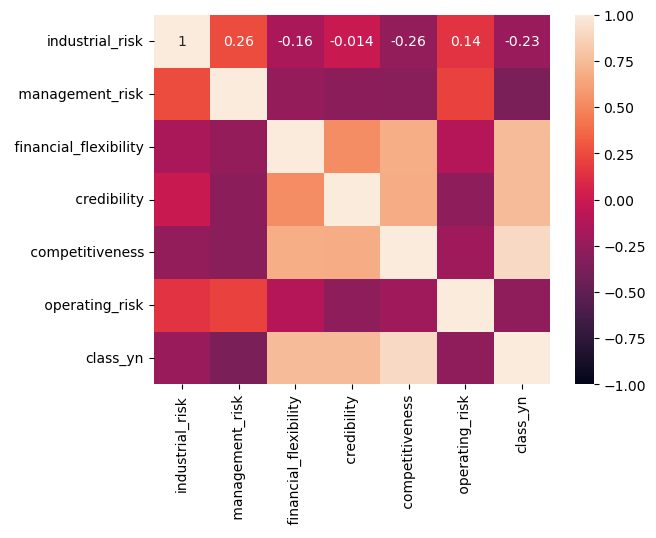

In [16]:
sns.heatmap(bankrupt.corr(), vmin=-1,vmax=1, annot=True)

<Axes: xlabel='class_yn', ylabel='count'>

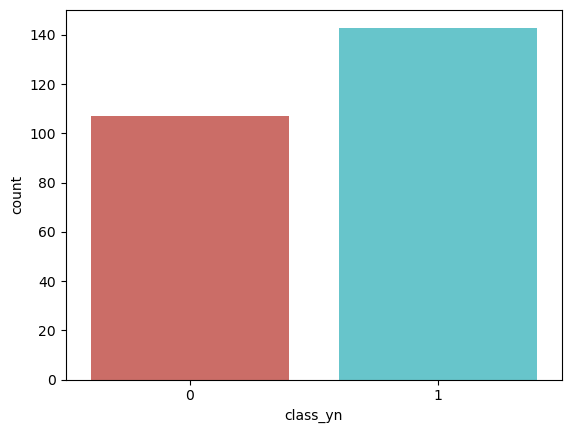

In [17]:
sns.countplot(x= 'class_yn', data=bankrupt, palette='hls')

<Axes: xlabel=' financial_flexibility', ylabel='count'>

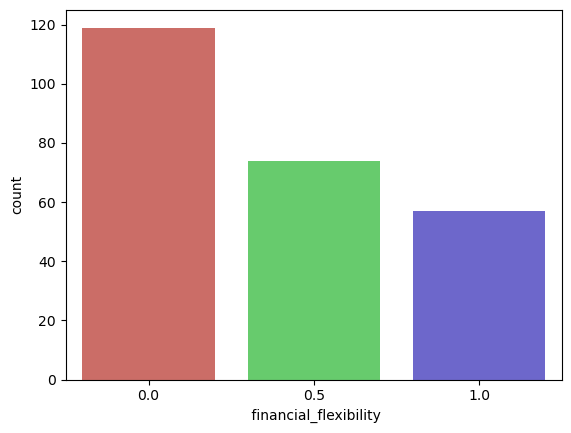

In [18]:
sns.countplot(x=' financial_flexibility', data=bankrupt, palette='hls')

<Axes: xlabel='class_yn'>

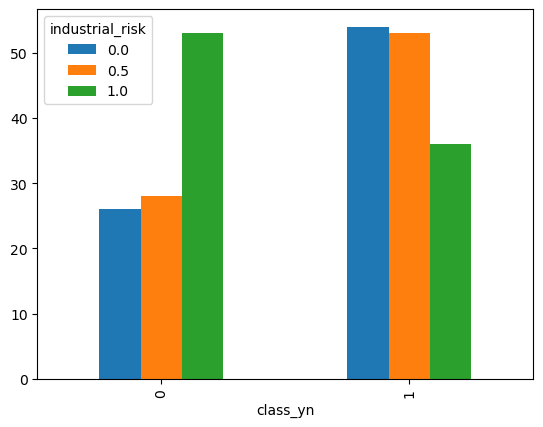

In [19]:
pd.crosstab(bankrupt.class_yn, bankrupt.industrial_risk).plot(kind='bar')

In [20]:
bankrupt.columns

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', 'class_yn'],
      dtype='object')

<Axes: xlabel=' financial_flexibility'>

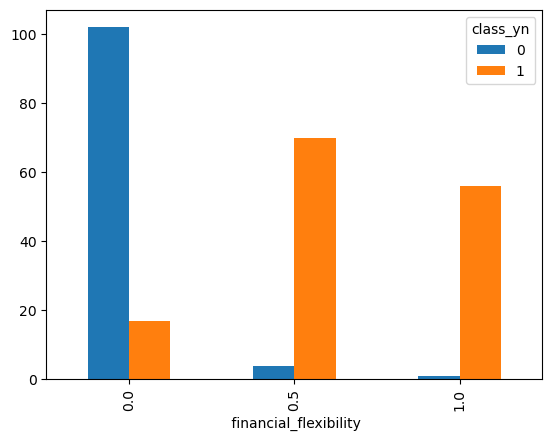

In [21]:
pd.crosstab(bankrupt[' financial_flexibility'], bankrupt['class_yn']).plot(kind='bar')

<Axes: xlabel=' credibility'>

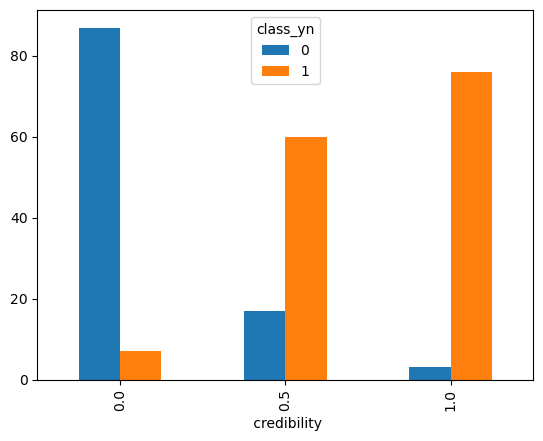

In [22]:
pd.crosstab(bankrupt[' credibility'], bankrupt.class_yn).plot(kind='bar')

<Axes: xlabel=' operating_risk'>

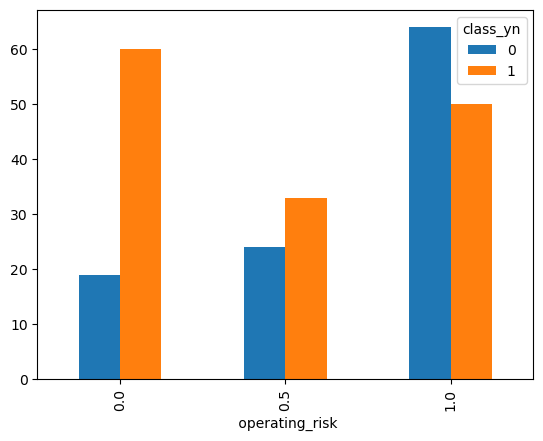

In [23]:
pd.crosstab(bankrupt[' operating_risk'], bankrupt.class_yn).plot(kind='bar')

<Axes: xlabel=' financial_flexibility'>

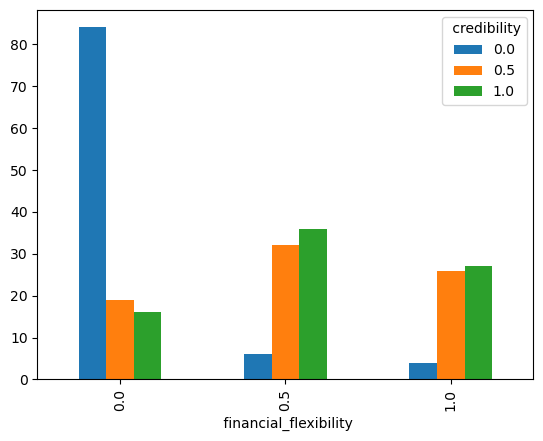

In [24]:
pd.crosstab(bankrupt[' financial_flexibility'], bankrupt[' credibility']).plot(kind='bar')

In [25]:
np.shape(bankrupt)

(250, 7)

In [26]:
X=bankrupt.iloc[:,0:6]
X

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
0,0.5,1.0,0.0,0.0,0.0,0.5
1,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,0.5,0.0,0.0,0.5,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0
246,1.0,1.0,0.5,1.0,1.0,0.0
247,0.0,1.0,1.0,0.5,0.5,0.0
248,1.0,0.0,0.5,1.0,0.5,0.0


In [27]:
y=bankrupt['class_yn']

In [28]:
y

0      0
1      0
2      0
3      0
4      0
      ..
245    1
246    1
247    1
248    1
249    1
Name: class_yn, Length: 250, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split # train and split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import  classification_report

### Splitting the data into train and test

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state=0)

### Model Building

### 1.Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [32]:
model.fit(X_train, y_train)

LogisticRegression()

### After training the model then we prediction on the test data

In [33]:
y_pred =  model.predict(X_test)

In [34]:
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [35]:
from sklearn.metrics import confusion_matrix

confusion_logist = confusion_matrix(y_test, y_pred)

confusion_logist

array([[26,  0],
       [ 0, 37]], dtype=int64)

### Accuracy of the model

In [36]:
train_acc_logist = np.mean(model.predict(X_train)== y_train)
train_acc_logist

0.9946524064171123

In [37]:
# Test Accuracy

test_acc_logist = np.mean(model.predict(X_test)== y_test)
test_acc_logist

1.0

In [38]:
from sklearn.metrics import accuracy_score

logistic_acc = accuracy_score(y_test, y_pred)
logistic_acc

1.0

### Accuracy of overall model

In [39]:
model.fit(X, y)

model.coef_ # coefficients of features

array([[-0.5741981 , -0.75397787,  2.61063166,  2.41434068,  4.00955826,
        -0.51358089]])

In [40]:
y_pred = model.predict(X)

confusion_matrix = confusion_matrix(y, y_pred)
confusion_matrix

array([[106,   1],
       [  0, 143]], dtype=int64)

In [41]:
acc = accuracy_score(y, y_pred)
acc

0.996

In [42]:
model.score(X_test, y_test)

1.0

In [43]:
model.score(X_train, y_train)

0.9946524064171123

### From the accuracy we can say that the model is overfitted to avoid overfit problem we use Regularozation method

#### here we have L1, L2 regularization

#### It turns out they have different but equally useful properties. From a practical standpoint, L1 tends to shrink coefficients to zero whereas L2 tends to shrink coefficients evenly. L1 is therefore useful for feature selection, as we can drop any variables associated with coefficients that go to zero.

#### L1 =Lasso Regularization

In [44]:
from sklearn import linear_model

lasso_reg = linear_model.Lasso(alpha = 50, max_iter = 100, tol =0.1)

lasso_reg.fit(X_train, y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [45]:
lasso_reg.score(X_test, y_test)

-0.0017265366431771234

In [46]:
lasso_reg.score(X_train, y_train)

0.0

### L2 = Ridge Regularization

In [47]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 50, max_iter = 100, tol = 0.1)

ridge_reg.fit(X_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [48]:
ridge_reg.score(X_test, y_test)

0.768839856224332

In [49]:
ridge_reg.score(X_train, y_train)

0.7452859981668727

### 2. KNN model

In [50]:
from sklearn.neighbors import KNeighborsClassifier as KNC
import warnings
warnings.filterwarnings('ignore')

### To choose k value

In [51]:
import math
math.sqrt(len(y_test))

7.937253933193772

### Here we are choosing the k value to be 7 (choosing odd value)

Define the model KNN and fit model

In [52]:
KNN_classifier = KNC(n_neighbors =7, p = 2, metric = 'euclidean')

In [53]:
KNN_classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

### Predict the Test set results

In [54]:
y_pred = KNN_classifier.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
      dtype=int64)

### Evaluate model

In [55]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[26  0]
 [ 1 36]]


In [56]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred))

0.9863013698630138


### Accuracy of KNN model

In [57]:
from sklearn.metrics import accuracy_score

KNN_acc = accuracy_score(y_test, y_pred)
KNN_acc

0.9841269841269841

### 3. Support Vector Machine

In [58]:
from sklearn.svm import SVC

### Kernel = Linear model

In [59]:
model_linear = SVC(kernel = 'linear')

model_linear.fit(X_train, y_train)

pred_test_linear = model_linear.predict(X_test)

np.mean(pred_test_linear==y_test)

1.0

### Kernel = ploy model

In [60]:
model_poly = SVC(kernel = "poly")
model_poly.fit(X_train,y_train)
pred_test_poly = model_poly.predict(X_test)

np.mean(pred_test_poly==y_test) # Accuracy

0.9841269841269841

### Kernel = 'rbf' model --> Radial Basis Function

In [61]:
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(X_train,y_train)
pred_test_rbf = model_rbf.predict(X_test)

np.mean(pred_test_rbf==y_test) # Accuracy

1.0

### from the above kernels in SVM polynomial kernel giving good accuracy

In [62]:
import pickle
with open("model_poly.pkl", "wb") as file:
    pickle.dump(model_poly, file)

In [63]:
%%writefile bank.py

UsageError: %%writefile is a cell magic, but the cell body is empty.


In [64]:
! wget -q -O - ipv4.icanhazip.com

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
! streamlit run bank.py 

In [ ]:
npx localtunnel --port 8501